# Principal Component Analysis (PCA) - Un-Supervised Technique

In [1]:
# Import necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset = pd.read_csv('Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
# Break the Dataset into Dependent and Independent Variables
X=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

In [4]:
#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [5]:
# Standardize our Data for better prediction
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explain_variance = pca.explained_variance_ratio_

explain_variance

array([0.37281068, 0.18739996, 0.10801208, 0.07619859, 0.06261922,
       0.04896412, 0.0417445 , 0.02515945, 0.02340805, 0.0184892 ,
       0.01562956, 0.01269224, 0.00687236])

Comment: As we can see in our 13D data, if we take first 2 dimensions its impact become more than 50 percent so it is good for our visualization and our prediction.

In [7]:
# Applying PCA to do dimensionality Reduction
from sklearn.decomposition import PCA

# Transform to 2D data
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explain_variance = pca.explained_variance_ratio_

X_train

array([[ 2.12849974, -1.01973208],
       [-2.94812519, -0.25480671],
       [ 1.91979542,  1.33701156],
       [-2.13337607, -0.94589715],
       [ 2.23680281, -2.2698391 ],
       [-2.28747076, -0.19935925],
       [-2.97244958, -0.29652264],
       [ 2.61809796, -0.77607001],
       [-1.04705463, -3.49093326],
       [ 2.60981596,  0.07345697],
       [ 0.15229677,  2.31809388],
       [-2.61422416, -2.54812754],
       [-2.50949512, -0.42770866],
       [ 1.72319479,  0.9119946 ],
       [-2.75936377, -0.38668107],
       [-2.82343185, -1.89597038],
       [ 1.36403459,  0.08545164],
       [-2.43383713,  0.11573802],
       [-2.25731631,  0.48629142],
       [ 1.12118381,  2.51095575],
       [-2.30339155,  1.25712557],
       [-2.50110791, -0.53720002],
       [ 0.16381003,  1.29094356],
       [ 2.55406891, -1.06285353],
       [-0.76747938,  3.08596417],
       [ 2.5338645 ,  0.10347674],
       [-0.51186299,  0.6924718 ],
       [ 0.53867836, -0.32318566],
       [ 3.55987441,

In [8]:
# Training our Logistic Regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [9]:
# Predict our testing data

y_pred= classifier.predict(X_test)

In [10]:
# Create Confusion Matrix to see the accuracy
# note: Right digonal shows correct predictions while left digonal shows wrong predictions
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 1, 20,  0],
       [ 0,  0,  8]], dtype=int64)

In [11]:
# To find accuracy of our model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9777777777777777

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


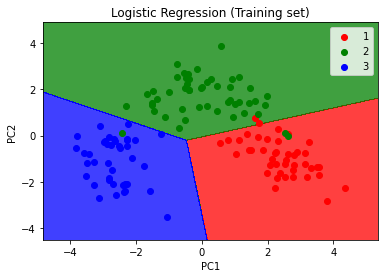

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


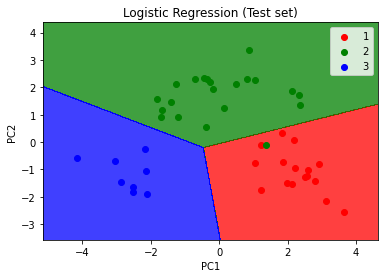

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Comment: In these graphs, red points in green portion and green points in red portion are the errors